# Lab 6 - Classifiers Boosting Algorithms

In this lab, we will implement the AdaBoost algorithm as an ensemble learning technique which
aims to combine a number of weak classifiers to yield a strong classifier at the end.
The idea of this lab is to identify whether a tumor with given characteristics is malignant or
benign. This is a two-class classification problem.

## Dataset and Features

You will be working on the dataset from *Hastie et al,* for breast tumor classification with 10 features representing the tumor's:

                              1. Area            6. Texture
                              2. Perimeter       7. Symmetry
                              3. Radius          8. Greyscale Level
                              4. Compactness     9. Fractal Dimension
                              5. Concavity      10. Coastline Approximation.
There is one output variable which is diagnosis. It takes one of two values `+1` for malignant and `-1` for benign.

### Question 1:
Why it is sometimes better to have the two class values `+1` and `-1` instead of `+1`
and `0`?\
**HINT :** Think about the voting scheme at the end of the boosting algorithm. How can the class values
affect this scheme?

In [17]:
'''
    Your answer: 
    Adaboost is a forward stage-wise additive model that assumes that the classifiers will give outputs of either -1 or 1 due to the use of the exponential loss function.
    However, the class labels only affect the voting scheme in the algorithm, where the original scheme compares the sum of alphas assigned to weak classifiers voting for the
    first class with the sum of alphas assigned to weak classifiers voting for the second class based on the sign of the summation. 
    Nevertheless, in the slides, an alternative formulation was presented that checks for the same conditions regardless of the labels used for the classes.
'''

'\n    Your answer: \n    Adaboost is a forward stage-wise additive model that assumes that the classifiers will give outputs of either -1 or 1 due to the use of the exponential loss function.\n    However, the class labels only affect the voting scheme in the algorithm, where the original scheme compares the sum of alphas assigned to weak classifiers voting for the\n    first class with the sum of alphas assigned to weak classifiers voting for the second class based on the sign of the summation. \n    Nevertheless, in the slides, an alternative formulation was presented that checks for the same conditions regardless of the labels used for the classes.\n'

## Requirement
You are required to fill the function `adaboost_classifier(Y_train, X_train, Y_test, X_test, T, clf).`\
This function takes as parameters:

| | |
|:---|:-|
| **Y_train**| The target values for the training set |
| **X_train**| The input features for the training set.|
| **Y_test**| The target values for the test set.|
| **Y_train**| The input features for the training set.|
| **T**| The number of iterations of the AdaBoost Algorithm.|
| **clf**| The classifier to be used. (In our case, we are using a decision tree stump as a base classifier). You can use any other classifier.|

This function should return two values:
- The accuracy of the model on the training set.
- The accuracy of the model on the test set.


#### Fair Note:
In the explanation video, we assumed that (T) is the number of models you want to fit. However, this is not always the case. You may have a model base (like here we have decision trees) and you are allowed to use as many of it as you can. So (T) here becomes the number of iterations where your goal is to enhance the performance with as few iterations as possible. 

Do not get confused:
- If your case is you have T models only, we set T = number of models to fit.
- If you are allowed to use as many models as you can (as many decision trees as you need), then T is the number of iterations to choose. In such case, T becomes a parameter controlled by the programmer.

In [2]:
## imports ##
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_hastie_10_2

import utils

**NOTE** we prepared some utility functions to help you throughout the lab. please go and check the file *utils.py* and make sure you understand each function and know how to use it.

### TODO: AdaBoost Implementation

AdaBoost is an iterative algorithm that gives weights for the best classifier every iteration, updates weights of the data points, then repeats until convergence.

The steps of the algorithm are:

1. Initialize weights of the training examples:

$$w_{m} = \frac {1}{M}, m = 1,2,...M$$

                                        M: number of training examples. 

2. For t=1 to $T$:

    a) Select a classifier $h_{t}$ that best fits to the training data using weights $w_{m}$ of the training examples.

    b) Compute error of $h_{t}$ as:
$$err_{t} = \frac {\Sigma_{m=1}^{M} w_{m} \phi (c_{m} \neq h_{t}(x_{m}))}{\Sigma_{m=1}^{M} w_{m}}$$

    c) Compute weight of classifier:
$$\alpha_{t} = \log (\frac {1-err_{t}}{err_{t}} )$$

    d) Update weights of wrongly classified examples:
$$w_{m} = w_{m} * \exp^{\alpha_{t} \phi (c_{m} \neq h_{t}(x_{m}))}, \space m = 1 ... M$$

    e) Renormalize weights $w_{m}$


\
3. Output: $C(x)= argmax_{k}\space (\space \Sigma_{t=1}^{T} \alpha_{t} * \phi (h_{t}(x) = k)) \space)$

**Where** in step 2.B and 2.D, the $\phi (y)$ function is called the *miss indicator* function that gives values:

                                     1: if y is True
                                     0: if y is False

In [13]:
def adaboost_classifier(Y_train, X_train, Y_test, X_test, T, clf):
    
    #TODO: FILL THE FUNCTION with the implementation as the steps above

    # TODO [1]: Initialize weights
    w = np.ones(X_train.shape[0]) / X_train.shape[0]

    ## TODO [2]:  Initialize the training and test data with empty array placeholders
    #### Hint: what should be their shape?
    pred_train = np.zeros(X_train.shape[0])
    pred_test = np.zeros(X_test.shape[0])

    ## TODO [3]: Loop over the boosting iterations 
    for i in range(T): 
        # TODO [4]: Fit a classifier with the specific weights 
        ## TODO [4.A]: fit the classifier on the training data
        #### Hint: search how sklearn.tree.DecisionTreeClassifier fits classifier on data
        ### Hint: search for parameter weights in the fit matrix
        # Fit a classifier with the specific weights 
        ## Fit the classifier on the training data
        h = clf.fit(X_train, Y_train, sample_weight=w)

        # TODO [4.B]: predict classes for the training data and test data
        pred_train_i = h.predict(X_train)
        pred_test_i = h.predict(X_test)

        # TODO [5]: calculate the miss Indicator function
        miss = [int(x) for x in (pred_train_i != Y_train)]

        # TODO [6]: calculate the error for the current classifier (err_t)
        err_t = np.dot(w,miss)/sum(w)

        # TODO [7]: calculate current classifier weight (Alpha_t)
        alpha_t = np.log((1 - err_t) / float(err_t))

        # TODO [8]: update the weights
        w = np.multiply(w, np.exp([float(x) * alpha_t for x in miss]))
        w = w / sum(w)

        # TODO [9] Add to the overall predictions
        pred_train = [sum(x) for x in zip(pred_train, [x * alpha_t for x in pred_train_i])]
        pred_test = [sum(x) for x in zip(pred_test, [x * alpha_t for x in pred_test_i])]

    # TODO [10]: Return error rate in train and test set
    #### Hint: use function get_accuracy from utils.py
    train_error = utils.get_accuracy(Y_train, np.sign(pred_train))
    test_error = utils.get_accuracy(Y_test, np.sign(pred_test))
    return train_error,test_error




### Testing the Boosted Classifier

Now we will use the function you implemented to build a classifer.\
You will not change code here, only read the code below and run it to see how **AdaBoost** enhanced the performance.

Reading Data ...
Number of Iterations :  10
Accuracy: Training: 0.6578 - Test: 0.6350
Number of Iterations :  60
Accuracy: Training: 0.8246 - Test: 0.8263
Number of Iterations :  110
Accuracy: Training: 0.8471 - Test: 0.8375
Number of Iterations :  160
Accuracy: Training: 0.8808 - Test: 0.8700
Number of Iterations :  210
Accuracy: Training: 0.9036 - Test: 0.8862
Number of Iterations :  260
Accuracy: Training: 0.9164 - Test: 0.8996
Number of Iterations :  310
Accuracy: Training: 0.9205 - Test: 0.9004
Number of Iterations :  360
Accuracy: Training: 0.9263 - Test: 0.9117


c:\Daily use\Materials\Senior II Computer engineer\neural network\lab6\Lab 6 - AdaBoost Classifier-20230424T002334Z-001\Lab 6 - AdaBoost Classifier\utils.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot1.set_xticklabels(range(0, 450, 50))


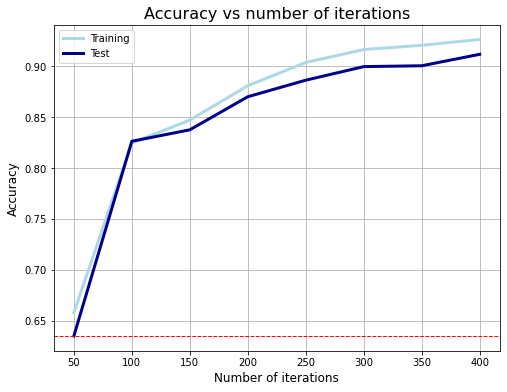

In [16]:
#### DO NOT CHANGE CODE ####

## First, read the dataset
x,y = make_hastie_10_2()
df = pd.DataFrame(x)
df['Y'] = y
print('Reading Data ...')

# Split into training and test set
train, test = train_test_split(df, test_size=0.2) # this function shuffles the data points, and splits the data into
                                                  # 80% training set and 20% test set (indicated by test_size=0.2)


X_train, Y_train = train.iloc[:, :-1], train.iloc[:, -1]
X_test, Y_test = test.iloc[:, :-1], test.iloc[:, -1]
# Fit a simple decision tree first
clf_tree = DecisionTreeClassifier(max_depth=1, random_state=1)

# Fit Adaboost classifier using a decision tree as base estimator
# Test with different number of iterations
acc_train, acc_test = [],[]
x_range = range(10, 410, 50)
for i in x_range:
    print('Number of Iterations : ' , i)
    acc_i = adaboost_classifier(Y_train, X_train, Y_test, X_test, i, clf_tree)
    acc_train.append(acc_i[0])
    acc_test.append(acc_i[1])
    # utils.print_accuracy(acc_i)
# Compare error rate vs number of iterations
utils.plot_accuracy(acc_train, acc_test)

### Question 2:
Justify why the plot is the way it is (is it increasing or decreasing? why? when does it flattens out?)

In [19]:
'''
    Your answer:
    it is increasing.The plot shows the accuracy of an Adaboost classifier over multiple iterations.
    At the beginning, the accuracy is relatively low, but it increases rapidly as the classifier learns from its mistakes and adjusts its weights accordingly.
    As the classifier becomes more accurate, the rate of improvement slows down, and the slope of the curve decreases. 
    At around 100 iterations, there is a significant drop in slope, which suggests that the classifier has made significant improvements to its accuracy. However, as the classifier continues to learn, it eventually reaches a point where there is little room for improvement, which causes the slope to decrease gradually until it flattens out after around 350 iterations. 
    The final accuracy of the classifier is around 90%, which suggests that it is relatively good at classifying the data.
    Overall, the plot shows how Adaboost can be used to iteratively improve the accuracy of a classifier by adjusting its weights based on its performance.
'''

'\n    Your answer:\n    it is increasing.The plot shows the accuracy of an Adaboost classifier over multiple iterations.\n    At the beginning, the accuracy is relatively low, but it increases rapidly as the classifier learns from its mistakes and adjusts its weights accordingly.\n    As the classifier becomes more accurate, the rate of improvement slows down, and the slope of the curve decreases. \n    At around 100 iterations, there is a significant drop in slope, which suggests that the classifier has made significant improvements to its accuracy. However, as the classifier continues to learn, it eventually reaches a point where there is little room for improvement, which causes the slope to decrease gradually until it flattens out after around 350 iterations. \n    The final accuracy of the classifier is around 90%, which suggests that it is relatively good at classifying the data.\n    Overall, the plot shows how Adaboost can be used to iteratively improve the accuracy of a class

### Question 3

The number of iterations (T) is what we call a hyper parameter:
   - Its value differs from model to model and from problem to problem.
   - Its value is not learnt by time, it is set by the programmer.
   
Suggest ways to select the optimal T keeping in mind that:
   - If T is too big, the training time is large (you loop for T times, each time takes a model to fit and this model might take hours to fit)
   - If T is too small, the boosting might not reach the best values it can get.
   
   

**HINT**: Look at the graph of number of iterations vs performance and search for elbow method. Try to understand it and explain what it does.\
**HINT**: There are other hyper-parameter selection techniques, search for them as well.

In [21]:
'''
    Your answer:
    One way to select the optimal T is by using the elbow method. This method involves plotting the performance (such as accuracy or error rate) against different values of T and identifying the point where the performance starts to flatten out or the rate of improvement slows down significantly. 
    This point is considered the "elbow" of the curve, and it indicates the optimal value of T.
    Another hyper-parameter selection technique is cross-validation. This involves splitting the dataset into multiple parts and using one part for testing and the remaining parts for training. 
    This process is repeated multiple times with different splits of the dataset, and the average performance is used to evaluate the model's hyperparameters.
    This technique can help to avoid overfitting and provide a more robust evaluation of the model.
    Additionally, grid search and random search are two popular techniques for hyperparameter tuning.
    Grid search involves defining a grid of hyperparameter values and training and evaluating the model for each combination of hyperparameters in the grid. 
    Random search involves randomly sampling hyperparameters from a predefined search space and training and evaluating the model for each set of hyperparameters. 
    These techniques can be computationally expensive but can help to identify the optimal hyperparameters for the model.
'''

'\n    Your answer:\n    One way to select the optimal T is by using the elbow method. This method involves plotting the performance (such as accuracy or error rate) against different values of T and identifying the point where the performance starts to flatten out or the rate of improvement slows down significantly. \n    This point is considered the "elbow" of the curve, and it indicates the optimal value of T.\n    Another hyper-parameter selection technique is cross-validation. This involves splitting the dataset into multiple parts and using one part for testing and the remaining parts for training. \n    This process is repeated multiple times with different splits of the dataset, and the average performance is used to evaluate the model\'s hyperparameters.\n    This technique can help to avoid overfitting and provide a more robust evaluation of the model.\n    Additionally, grid search and random search are two popular techniques for hyperparameter tuning.\n    Grid search invol